In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv('study_dataset.csv', encoding='utf-8', sep='\t', index_col=0)
data.head()

,business_id,name,stars,text
882258,TyYpzJzeKWtyMdPFtPRUEg,Prince Pizza,1,This place was horrible! They got my entire or...
642407,LCMpkeQWHdCbuX0Nlkmeow,Jack in the Box,1,I have no idea why I bother. It's the closest ...
831418,AZ42H2kk4JUiskC9NPoUjw,Hobnobber's Variety Bar & Restaurant,1,After reading glowing reviews of staff and foo...
452134,0CeoONLXqseUxPdGerefOQ,Mexican Post,1,Horrible Ground beef/bean Chimichanga. There w...
921422,QYEiZzwL8I4-q_3U0bq0eQ,The Nutrition Factory,1,They are usually awesome but picked up a kale ...


In [20]:
# nb de reviews
data.shape[0]

3887

In [41]:
data["len_text"] = data["text"].str.len()

In [42]:
data.head()

,business_id,name,stars,text,len_text
882258,TyYpzJzeKWtyMdPFtPRUEg,Prince Pizza,1,This place was horrible! They got my entire or...,308
642407,LCMpkeQWHdCbuX0Nlkmeow,Jack in the Box,1,I have no idea why I bother. It's the closest ...,339
831418,AZ42H2kk4JUiskC9NPoUjw,Hobnobber's Variety Bar & Restaurant,1,After reading glowing reviews of staff and foo...,1269
452134,0CeoONLXqseUxPdGerefOQ,Mexican Post,1,Horrible Ground beef/bean Chimichanga. There w...,194
921422,QYEiZzwL8I4-q_3U0bq0eQ,The Nutrition Factory,1,They are usually awesome but picked up a kale ...,192


In [27]:
# nb de restaurant
# reviews_per_business = data.groupby("business_id").count()["stars"]
reviews_per_business = data.groupby("business_id")
# reviews_per_business.shape[0]

In [43]:
agg = {
    'stars': ['count'],
    'len_text': ['mean']
}

In [45]:
stat_reviews = data.groupby(['business_id']).agg(agg)
stat_reviews.columns = pd.Index([e[0] + "_" + e[1] for e in stat_reviews.columns.tolist()])
stat_reviews.head()

,stars_count,len_text_mean
business_id,,
-0TffRSXXIlBYVbb5AwfTg,1,686.0
-1B9pP_CrRBJYPICE5WbRA,1,157.0
-1oygVebK81K8JEPI6H6Lw,1,668.0
-3AooxIkg38UyUdlz5oXdw,1,511.0
-3Mc8R5c23FxrxlJn3ivww,1,939.0


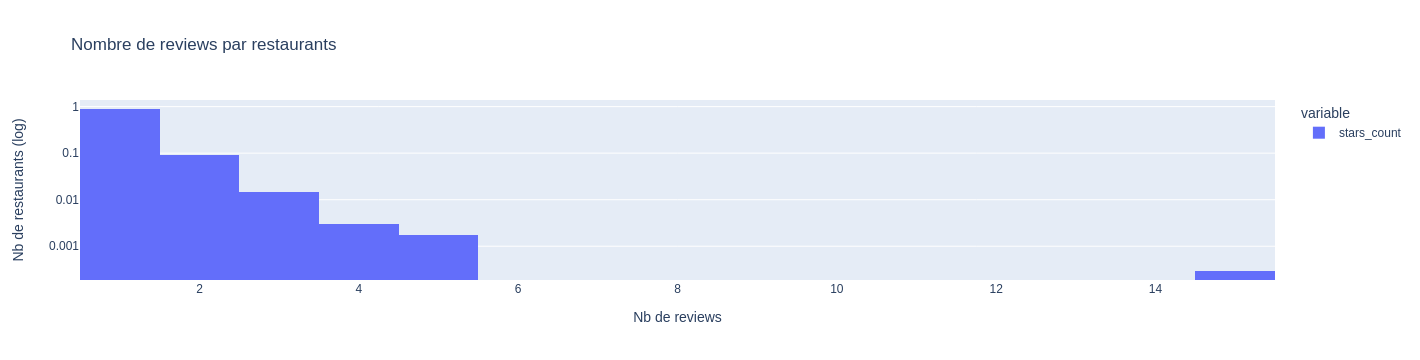

In [47]:
fig = px.histogram(
    stat_reviews["stars_count"],
    title=f"Nombre de reviews par restaurants",
    log_y=True,
    histnorm="probability density",
)
fig.update_layout(
    xaxis_title_text="Nb de reviews",
    yaxis_title_text="Nb de restaurants (log)",
)
fig.show()

In [51]:
# restaurant ayant le plus de reviews
max_restau = stat_reviews.loc[stat_reviews["stars_count"] > 10, :]
max_restau

,stars_count,len_text_mean
business_id,,
IkY2ticzHEn4QFn8hQLSWg,15,569.4


In [57]:
name_max_restau = data.loc[data["business_id"] == "IkY2ticzHEn4QFn8hQLSWg", ["name"]]
name_max_restau.head(1)

,name
374686,Geno's Steaks


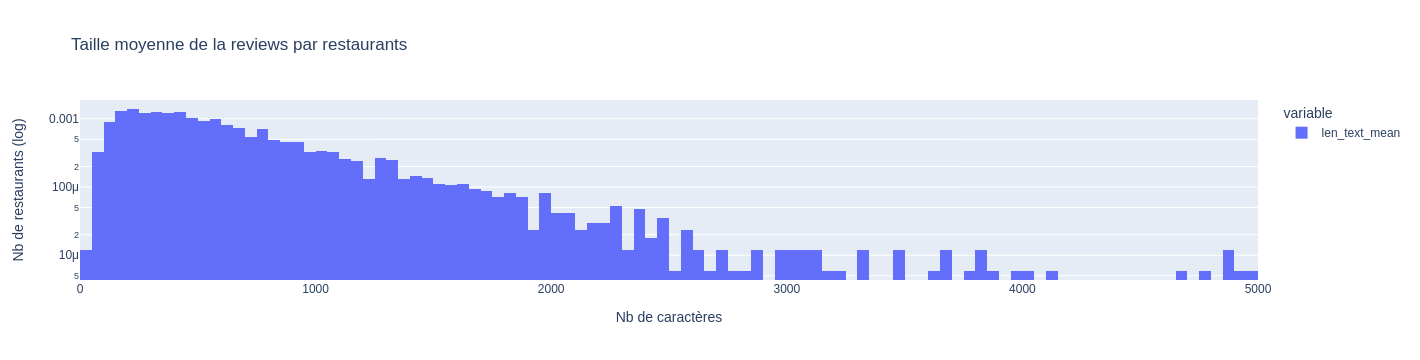

In [58]:
fig = px.histogram(
    stat_reviews["len_text_mean"],
    title=f"Taille moyenne de la reviews par restaurants",
    log_y=True,
    histnorm="probability density",
)
fig.update_layout(
    xaxis_title_text="Nb de caractères",
    yaxis_title_text="Nb de restaurants (log)",
)
fig.show()

In [59]:
def plot_univarie(df, list_col):
    """ Affiche les mesures et les histogrammes de variables numériques """
    for col in list_col:
        print("-"*70)
        print("Colonne :", col)
        # mesures de tendances centrales
        print("moyenne : ", df[col].mean())
        print("médiane : ", df[col].median())
        print("mode : ", df[col].mode())
        print("min : ", df[col].min())
        print("max : ", df[col].max())
        quartiles = [np.percentile(df[col], p) for p in [25, 75]]
        print("quartiles : ", quartiles)
        # mesures de dispersion
        print("variance : ", df[col].var(ddof=0))
        print("écart-type : ", df[col].std(ddof=0))
        print("coefficient de variation : ", df[col].std(ddof=0)/df[col].mean())
        # mesures de forme
        print("skewness : ", df[col].skew())
        print("kurtosis : ", df[col].kurtosis())
        df[col].hist(bins=25)
        plt.xlabel(col)
        # pour tracer les 1er et 3ème quartiles
        min_ylim, max_ylim = plt.ylim()
        # plt.xticks(np.arange(-15, 41, 5))
        plt.axvline(quartiles[0], color='k', linestyle='dashed', linewidth=1)
        plt.text(quartiles[0], max_ylim*0.95, ' {:.0f}'.format(quartiles[0]))
        plt.axvline(quartiles[1], color='k', linestyle='dashed', linewidth=1)
        plt.text(quartiles[1], max_ylim*0.85, ' {:.0f}'.format(quartiles[1]))
        plt.show()
        print("-"*70)

----------------------------------------------------------------------
Colonne : len_text_mean
moyenne :  658.4766647081864
médiane :  502.0
mode :  0    253.0
Name: len_text_mean, dtype: float64
min :  18.0
max :  4984.0
quartiles :  [292.0, 835.25]
variance :  309216.8957753166
écart-type :  556.0727432407712
coefficient de variation :  0.8444835983477151
skewness :  2.544559079100685
kurtosis :  10.486215719855002


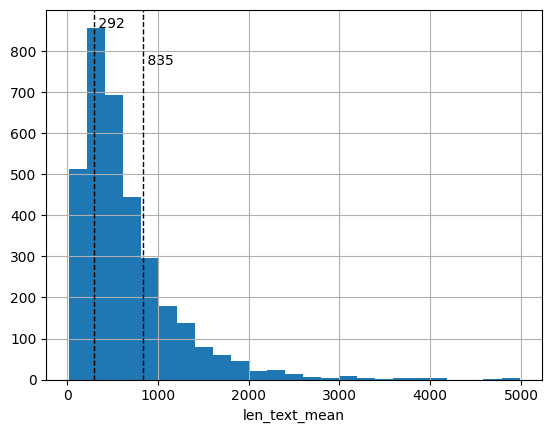

----------------------------------------------------------------------
----------------------------------------------------------------------
Colonne : stars_count
moyenne :  1.1418918918918919
médiane :  1.0
mode :  0    1
Name: stars_count, dtype: int64
min :  1
max :  15
quartiles :  [1.0, 1.0]
variance :  0.2439677485946582
écart-type :  0.4939309147994871
coefficient de variation :  0.4325548839664147
skewness :  9.16013402010465
kurtosis :  193.0220086347156


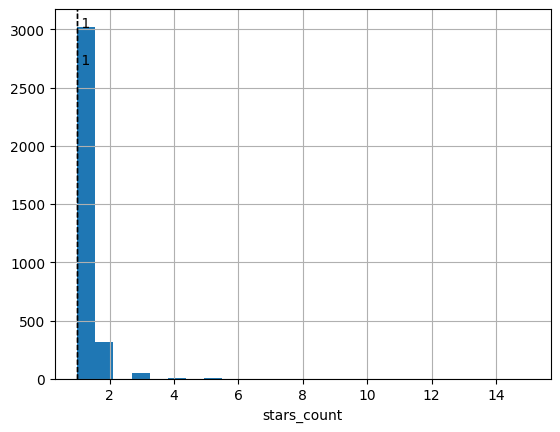

----------------------------------------------------------------------


In [62]:
plot_univarie(stat_reviews, ["len_text_mean", "stars_count"])

<AxesSubplot: ylabel='Frequency'>

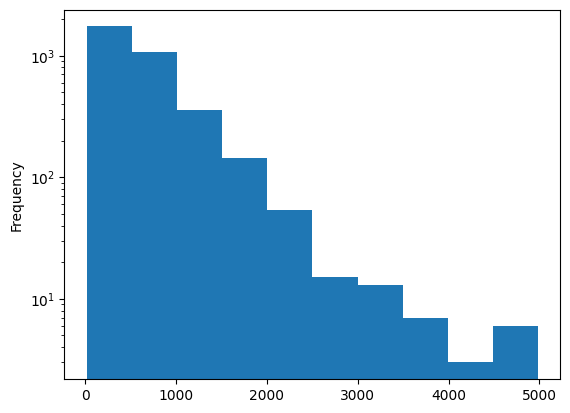

In [63]:
stat_reviews['len_text_mean'].plot(kind='hist', logy=True)

<AxesSubplot: ylabel='Frequency'>

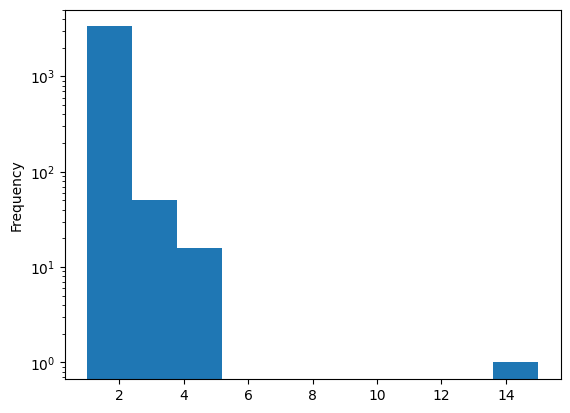

In [64]:
stat_reviews['stars_count'].plot(kind='hist', logy=True)

In [12]:
# pour les pie charts, pour afficher les pourcentages et les libellés uniquement avec le taux > limit_perc%
limit_perc = 5
def show_perc(pct):
    """ Affiche le pourcentage de chaque portion si la condition est vérifiée """
    return ('%.1f%%' % pct) if pct > limit_perc else ''

def show_labels(data):
    list = []
    for val, cnt in data.items():
        if (cnt*100/np.sum(data)) > limit_perc :
            list.append(val)
        else:
            list.append('')
    return list

In [13]:
def show_unique_values(df, col, display_pie=True, silent=False):
    """
    Affiche la liste des valeurs uniques contenues dans une colonne
    Affiche le pie chart de ces données également
    """
    temp_val_count = df[col].value_counts(normalize=True)
    df_val_count = temp_val_count.rename_axis("categ").to_frame("%")
    df_val_count["%"] = round(df_val_count["%"]*100, 2)
    df_val_count["%_cumul"] = df_val_count["%"].cumsum()
    # afficher la majeur partie des catégories
    sub_display = df_val_count.loc[df_val_count["%_cumul"] <= 85, :]
    
    if silent:
        return sub_display
    
    if len(sub_display) < 5:
        display(df_val_count.head())
    else:
        display(sub_display.head(len(sub_display)))
    if display_pie:
        temp_val_count.plot(kind='pie', autopct=show_perc, labels=show_labels(temp_val_count), label='')
        plt.axis('equal')
        plt.show()
    return sub_display

,%,%_cumul
categ,,
1,58.19,58.19
2,41.81,100.00


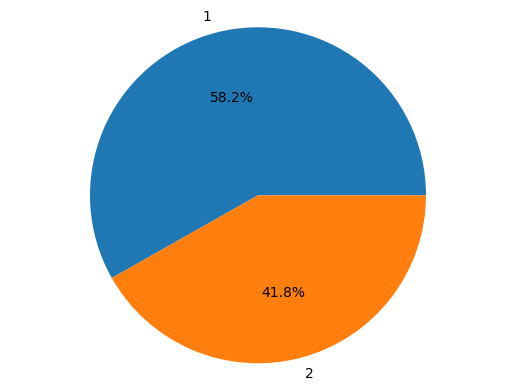

In [17]:
res = show_unique_values(data, "stars")